# GRO Redemption Overview

## Datasets

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('../data/gro_data.csv')

df.head()

,Address,UserType,NetTokenValue
0,0x01ab07010c2f4bf5971537669cc19d5d8cf320a0,Community,60.19
1,0x03387d5015f88aea995e790f18ef7ff9dfa0943c,Community,"2,579.52"
2,0x03a13b51afedaac32fd63092c0dc75e00536096d,Community,"1,239.12"
3,0x03ce77d68c5ef952d91ff53c336ffa260f43caa0,Community,616.49
4,0x04106fdd34485c03794f112e1c71ec6706bbb506,Team,"84,507.38"


## Key Figures

In [105]:
# Total GRO deposited
print(f'Total GRO deposited: {df["NetTokenValue"].sum():,.2f}\n')

# Unique addresses
print(f'Unique addresses deposited: {df["Address"].nunique()}\n')

# GRO deposited by user type
print('GRO deposited by user type:')
sum_values = df.groupby('UserType')['NetTokenValue'].sum()
for user_type, value in sum_values.items():
   print(f"   {user_type:<10}: {value:,.2f}")

print("\nTop 10 depositors:")
# Remove scientific notation
pd.set_option("display.float_format", "{:,.2f}".format)
# Sort by NetTokenValue in descending order
df_top10 = (
    df.sort_values("NetTokenValue", ascending=False).head(10).reset_index(drop=True)
)
# show index starting by 1 (for top 10 ranking)
df_top10.index += 1
df_top10

# @dev: other potential analyses
#  - GRO not deposited into redemption


Total GRO deposited: 34,691,611.64

Unique addresses deposited: 266

GRO deposited by user type:
   Community : 9,328,810.64
   Investor  : 9,918,134.95
   Owner     : 13,619,794.35
   Team      : 1,824,871.70

Top 10 depositors:


,Address,UserType,NetTokenValue
1,0x273131a3ec63ba4fa5f1b10b10883d275c12d1c3,Investor,"3,153,604.72"
2,0xe0c49897f6e9e6bd530c4175af8a35e02e7a33e7,Community,"3,148,642.31"
3,0x592ca03d4903ff7dd3e247fe2a8229c7ddf145c8,Owner,"3,139,294.35"
4,0x48d2b6fd872f32fe185c0850ec4bfee064587491,Owner,"2,100,000.00"
5,0xbf787269c02c345ec315d8424c98118cb6e750fe,Owner,"2,100,000.00"
6,0xce6c0f548be5c79d4bad219863d603c31eb8a847,Investor,"2,048,997.60"
7,0x8796abe8dce8fee368e95a88b731636ef5749926,Owner,"1,626,600.00"
8,0x147488c0401dfd94d84b39f77e8630dd21763d97,Investor,"1,136,284.65"
9,0xe73f4e9a51868c5e631c74e6ca5bff357772fbd8,Investor,"1,133,347.00"
10,0xa7e6e9d8387a389c9963fac2b7297e4d9410b93a,Owner,"942,000.00"


## Visuals

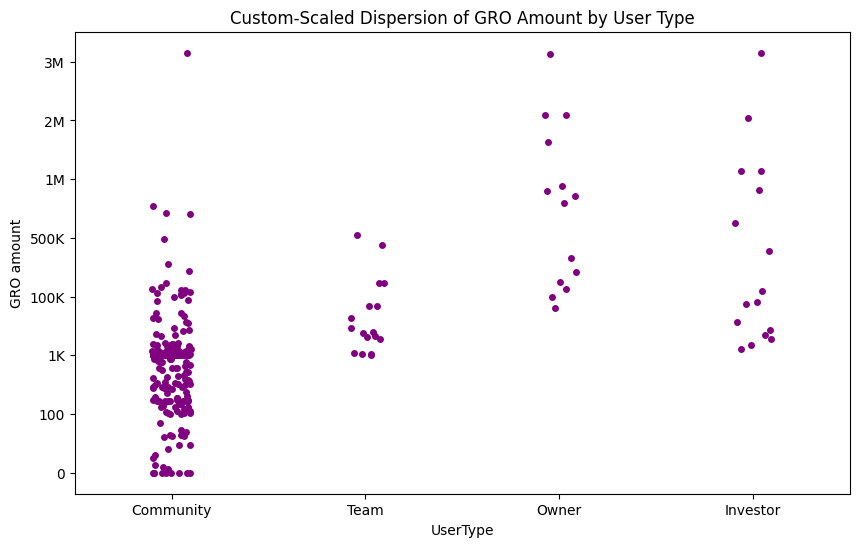

In [106]:
def custom_transformation(y):
    if y <= 100:
        return y / 100
    elif y <= 1_000:
        return 1 + (y - 100) / (1_000 - 100)
    elif y <= 100_000:
        return 2 + (y - 1_000) / (100_000 - 1_000)
    elif y <= 500_000:
        return 3 + (y - 100_000) / (500_000 - 100_000)
    elif y <= 1_000_000:
        return 4 + (y - 500_000) / (1_000_000 - 500_000)
    elif y <= 2_000_000:
        return 5 + (y - 1_000_000) / (2_000_000 - 1_000_000)
    else:
        return 6 + (y - 2_000_000) / (3_000_000 - 2_000_000)

# Apply the custom transformation to the 'NetTokenValue' column
df['TransformedValue'] = df['NetTokenValue'].apply(custom_transformation)

plt.figure(figsize=(10, 6))
sns.stripplot(x="UserType", y="TransformedValue", data=df, color='purple')

y_ticks = [0, 1, 2, 3, 4, 5, 6, 7]  
y_labels = ['0', '100', '1K', '100K', '500K', '1M', '2M', '3M'] 
plt.yticks(y_ticks, y_labels)

plt.title('Custom-Scaled Dispersion of GRO Amount by User Type')
plt.ylabel('GRO amount')
plt.show()


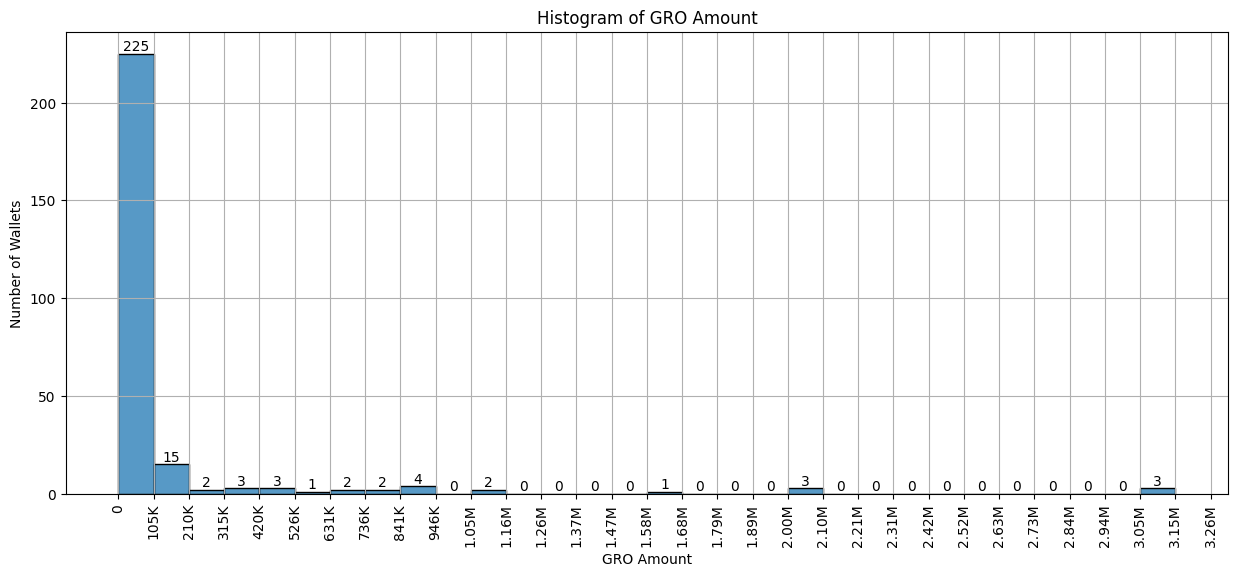

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the figure and axis
plt.figure(figsize=(15, 6))

# Histogram for GRO amount
ax = sns.histplot(df['NetTokenValue'], bins=30)

plt.title('Histogram of GRO Amount')
plt.xlabel('GRO Amount')
plt.ylabel('Number of Wallets')
plt.grid(True)

# Calculate bin edges and width
bin_width = (df['NetTokenValue'].max() - df['NetTokenValue'].min()) / 30
bin_edges = np.arange(df['NetTokenValue'].min(), df['NetTokenValue'].max() + bin_width, bin_width)

# Custom function to format the tick labels
def format_label(value):
    if value >= 1e6:  # values in millions
        return f'{value/1e6:.2f}M'
    elif value >= 1e3:  # values in thousands
        return f'{value/1e3:.0f}K'
    else:
        return str(int(value))

# Apply formatting function to the bin edges for the x-axis labels
formatted_labels = [format_label(edge) for edge in bin_edges]

# Set the x-axis labels
plt.xticks(ticks=bin_edges, labels=formatted_labels)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Loop through each bar (patch) and add a text annotation with the height (count)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()


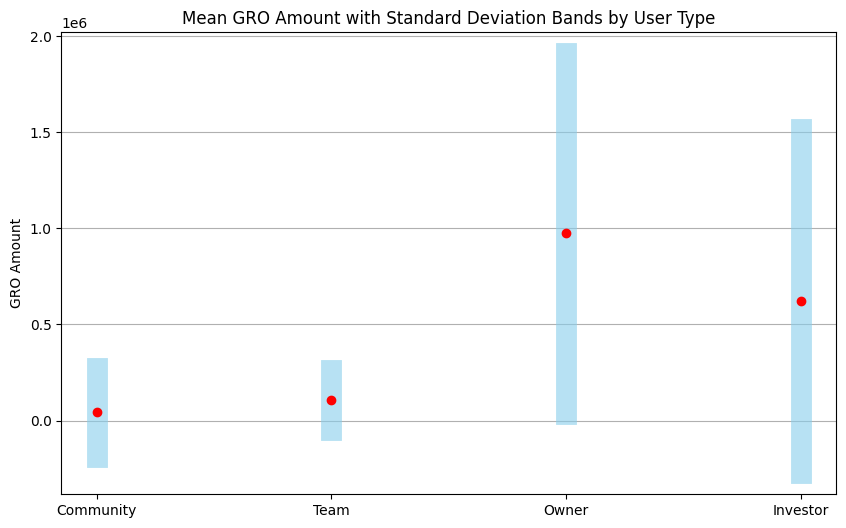

In [108]:
# Calculating the mean and standard deviation for each UserType
means = df.groupby('UserType')['NetTokenValue'].mean()
std_devs = df.groupby('UserType')['NetTokenValue'].std()

plt.figure(figsize=(10, 6))

# Plotting the means with standard deviation bands
for i, user_type in enumerate(df['UserType'].unique()):
    plt.plot([i, i], [means[user_type] - std_devs[user_type], means[user_type] + std_devs[user_type]], color='skyblue', linewidth=15, alpha=0.6)
    plt.plot(i, means[user_type], 'ro')

plt.xticks(range(len(df['UserType'].unique())), df['UserType'].unique())
plt.title('Mean GRO Amount with Standard Deviation Bands by User Type')
plt.ylabel('GRO Amount')
plt.grid(axis='y')

plt.show()


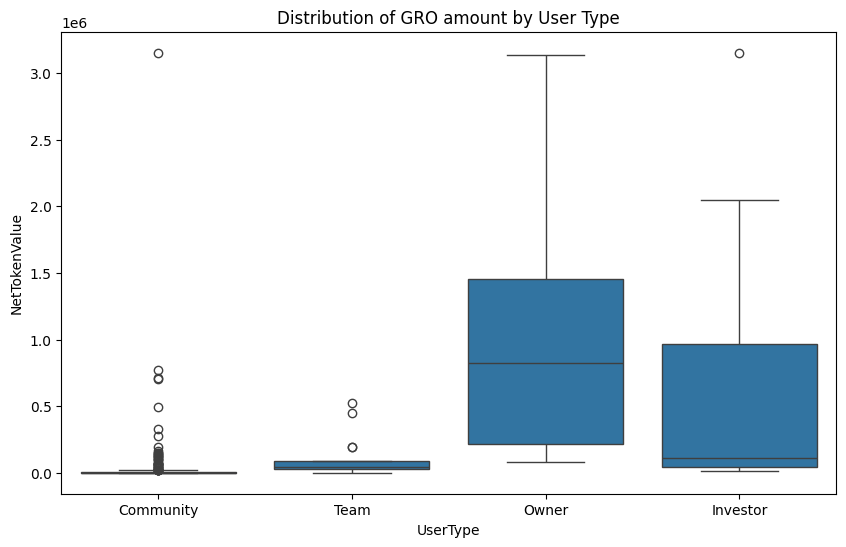

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="UserType", y="NetTokenValue", data=df)
plt.title('Distribution of GRO amount by User Type')

plt.show()

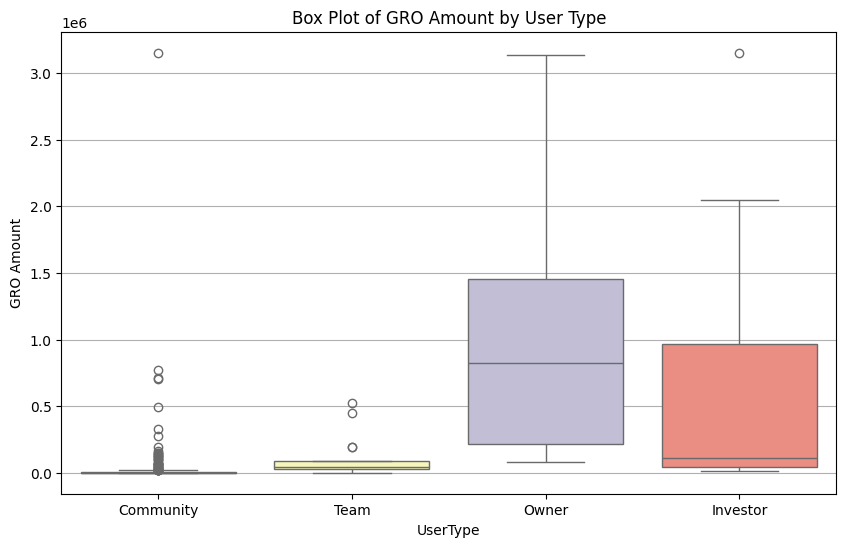

In [110]:
plt.figure(figsize=(10, 6))

# Box plot of GRO amount by UserType
sns.boxplot(x='UserType', y='NetTokenValue', data=df, palette="Set3", hue='UserType', legend=False)

plt.title('Box Plot of GRO Amount by User Type')
plt.ylabel('GRO Amount')
plt.grid(axis='y')

plt.show()